In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df = pd.read_csv(r'C:\Users\saina\Documents\DataScience\Datafiles\Visadataset.csv')

cat_columns = visa_df.select_dtypes(include='object').columns
num_columns = visa_df.select_dtypes(exclude='object').columns
cat_columns, num_columns

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

**Bivariate Analylsis**

- We already seen univariate analysis
- We performed the categorical columns analysis
    - Frequency table (Value Counts)
    - Bar Chart
    - Relative Frequency table (Value Counts Normalized form)
    - Pie chart
- We performed the numerical column analysis
    - Histogram
    - Distribution Plots
    - Box Plot
    - Outlier analysis
    - Filling the outliers
- Now we will do Categorical-Categorical Analysis
- Numerical-Numerical analysis
- Categorical-Numerical analysis

**Categorical-Categorical**

- Lets consider two columns
    - Continent
    - Case Status

In [2]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [3]:
# Continent
cont_df = visa_df['continent'].value_counts()
cont_df

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
# Case Status
cs_df = visa_df['case_status'].value_counts()
cs_df

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the Certified observations continent wise
- Find the Denied observations continent wise

In [6]:
# Approach

# Step-1: Make the first condition continent =='Asia'
# Step-2: Make the second condition case_status =='Certified'
# Step-3: Make the third condition = Condition1 and condition2
# Step-4: Then retrieve the dataframe and take the count

cond1 = visa_df['continent']=='Asia'
cond2 = visa_df['case_status']=='Certified'
cond3 = cond1 & cond2
visa_df[cond3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [12]:
list1 = []
continents = visa_df['continent'].unique()

for i in continents:
    cond1 = visa_df['continent']== i
    cond2 = visa_df['case_status']=='Certified'
    cond3 = cond1 & cond2
    list1.append(len(visa_df[cond3]))
pd.DataFrame(zip(continents, list1),columns=['continent','certified_count'])

,continent,certified_count
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [13]:
list1 = []
continents = visa_df['continent'].unique()

for i in continents:
    cond1 = visa_df['continent']== i
    cond2 = visa_df['case_status']=='Denied'
    cond3 = cond1 & cond2
    list1.append(len(visa_df[cond3]))
pd.DataFrame(zip(continents, list1),columns=['continent','denied_count'])

,continent,denied_count
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [15]:
certified_list = []
denied_list = []
continents = visa_df['continent'].unique()

for i in continents:
    cond1 = visa_df['continent']== i
    cond2 = visa_df['case_status']=='Certified'
    cond3 = visa_df['case_status']=='Denied'
    cert_cond = cond1 & cond2
    denied_cond = cond1 & cond3
    certified_list.append(len(visa_df[cert_cond]))
    denied_list.append(len(visa_df[denied_cond]))
pd.DataFrame(zip(continents, certified_list, denied_list),columns=['continent','certified_count', 'denied_count'])

,continent,certified_count,denied_count
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [33]:
# Dataframe-1
df1 = pd.DataFrame(zip(continents, certified_list),columns=['continent','certified_count'])
df1

,continent,certified_count
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [34]:
# Dataframe-2
df2 = pd.DataFrame(zip(continents, denied_list),columns=['continent','denied_count'])
df2

,continent,denied_count
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [35]:
# Dataframe-3
df3 = pd.DataFrame(zip(continents, certified_list, denied_list),columns=['continent','certified_count', 'denied_count'])
df3

,continent,certified_count,denied_count
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [36]:
# Dataframe-3
df3 = pd.DataFrame(zip(certified_list, denied_list),columns=['certified_count', 'denied_count'], index=continents)
df3

,certified_count,denied_count
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- The above data frame we can make by using a method: **cross tab**
- It is available in pandas
- It takes two arguments
    - index
    - column
- In above data frame index is : continent
- In above data frame data is: case_status

In [30]:
# Dataframe-4
df4 = pd.crosstab(visa_df['continent'],visa_df['case_status'])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

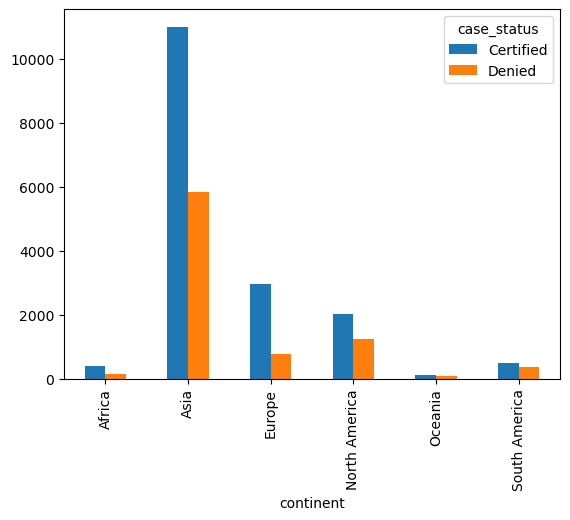

In [31]:
df4.plot(kind='bar')

<Axes: >

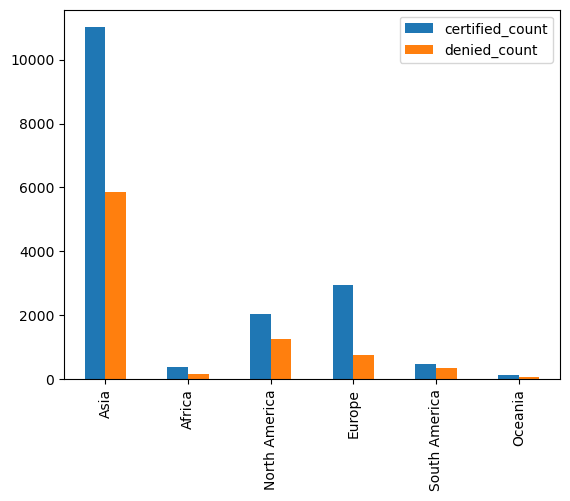

In [37]:
df3.plot(kind='bar')

**Multivariate Analysis**

- Education
- Continent
- Case Status

- We alerady know that from Asia there are around 11K Certified visa
- In that again I want to further break down based on education
- here also pd.crosstab()
    - First fix your index of any one column out of three columns
    - Then keep two columns in a list and pass as data column

In [38]:
# Dataframe-5
idx = visa_df['continent']
data_cols = [visa_df['education_of_employee'],visa_df['case_status']]
df5 = pd.crosstab(idx, data_cols)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [39]:
# Dataframe-6
idx = visa_df['continent']
data_cols = [visa_df['case_status'],visa_df['education_of_employee']]
df6 = pd.crosstab(idx, data_cols)
df6

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

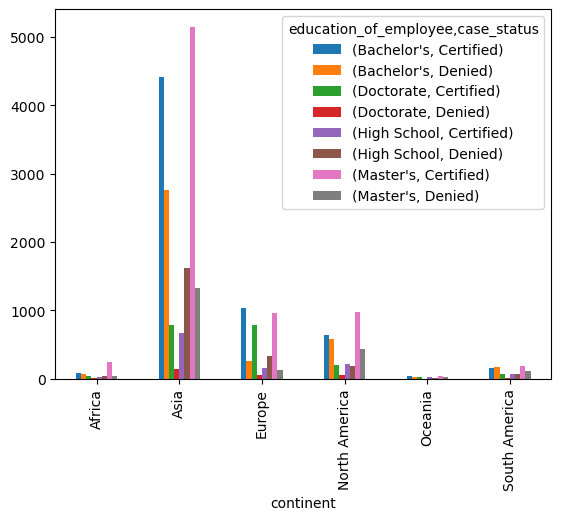

In [40]:
df5.plot(kind='bar')

<Axes: xlabel='continent'>

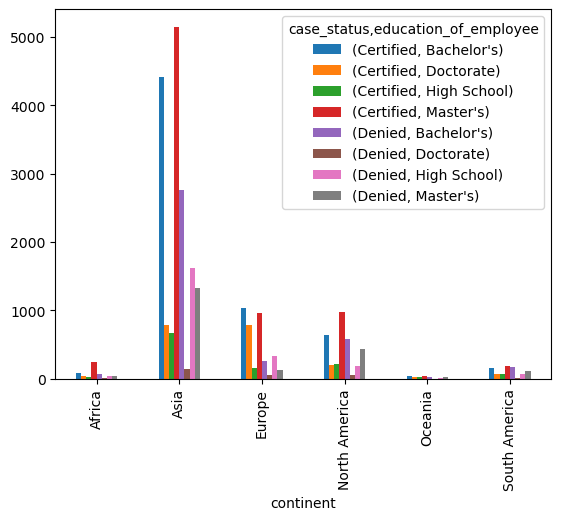

In [41]:
df6.plot(kind='bar')

**Numerical vs Numerical**

- To understand Numerical columns relation we need to plot scatter plots
- Scatter plots gives the realtion between two numerical columns
- Bar Chart - Pie Chart - Histogram - Scatter Plots
- Scatter Plots under matplotlib package
- **plt.scatter**

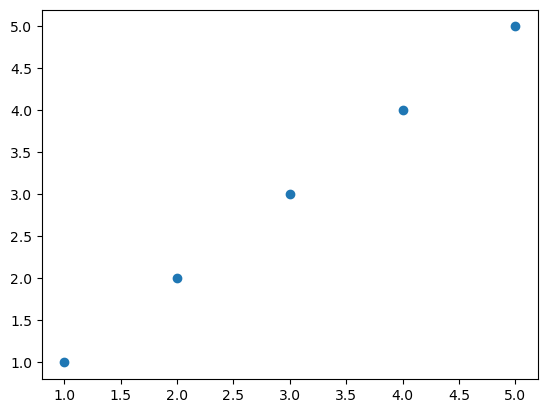

In [43]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)

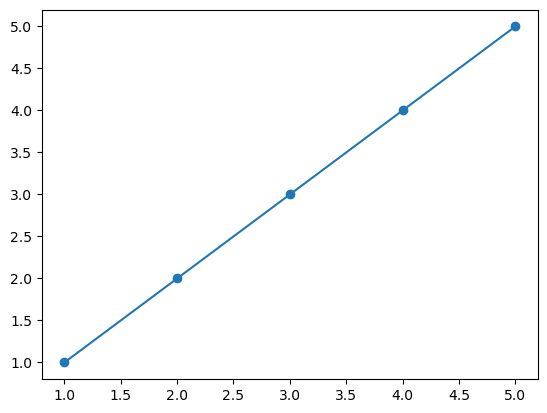

In [44]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

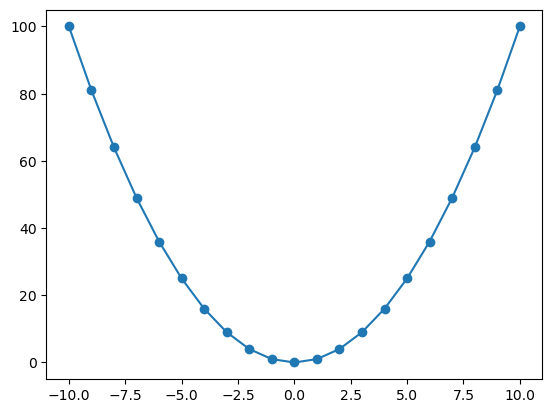

In [47]:
# Parabola
x = [i for i in range(-10,11)]
y = [i**2 for i in range(-10,11)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
# Step-1: Read one numerical column
# Step-2: Read another numerical column
# Step-3: Apply the scatter plot

In [49]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

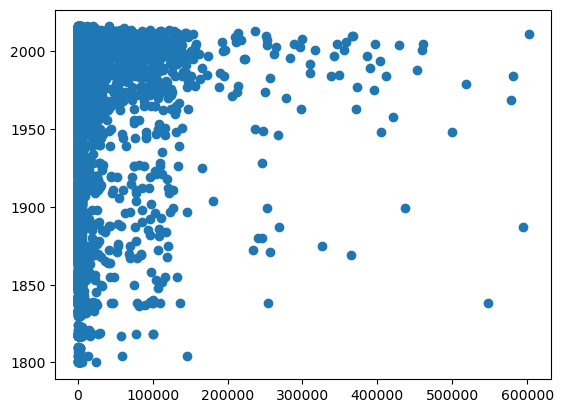

In [53]:
x = visa_df['no_of_employees']
y = visa_df['yr_of_estab']
plt.scatter(x,y)


# Plot looks like there is no relation, but there are data points which shows some relation
# We should find Coefficient Correlation formation

- Covariance vs Correlation
    - Covariance will tell about the columns have relation or not
    - Covariance will explain about relation status
        - Positive relation
        - Negative relation
        - No relation
    - Correlation tells about how much relation between two variables
    - It denotes with 'r'
    - r varies from -1 to 1
    - -1 to 0 indicates negative relation quantity
    - 0 to 1 indicates positive relation quantity
    - 0 indicates no relation
    

**method name  corr**

In [55]:
visa_df.corr()

ValueError: could not convert string to float: 'EZYV01'

In [58]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat Map**

- Heat Map is one of the important visualization method, to show the matrix form of values
- It is under **seaborn** package
- In every matrix we have highest values and lowest values available
- Heat map gives the color visualization
- Also it provides color bar, which color indicates which value

<Axes: >

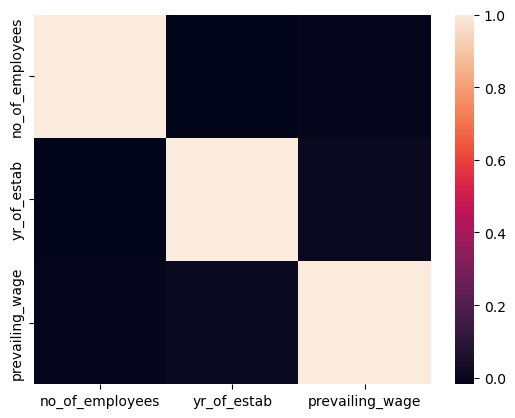

In [60]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)

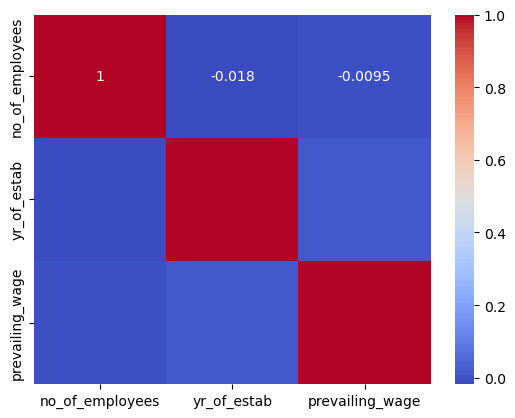

In [63]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.show()

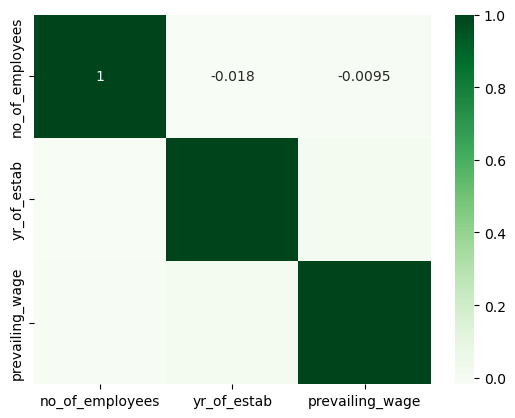

In [65]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True, cmap='Greens')
plt.show()

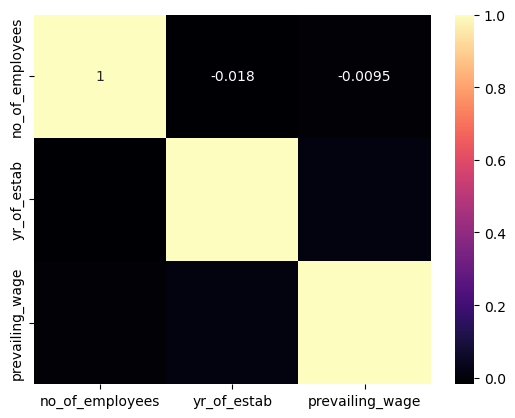

In [66]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True, cmap='magma')
plt.show()

# Observations
- By seeing the graphs we might not say the relation status 
- It is best practice to get the percentage of relation using correlation
- All three columns having approximately 0 percentage of relation
- Which indicates all the columns having no relation
- No relationship means independent to each other
- In ML models we expec the input columns should be independent to each other
- Corr method gives matrix view
- We have 3 columns, so 3x3 = 9 fields
- If a data has 20 columns, then 20 x 20 = 400 fields
- Thats why always go with Heat map visualization